In [235]:
# Importamos las librerias necesarias para nuestro proyecto
import pandas as p
import matplotlib
import matplotlib.pyplot as plot
import seaborn as sb

In [236]:
# Importamos nuestros datos desde el csv
diabetes_original = p.read_csv("diabetes.csv")

# Quitamos la columna "Outcome" ya que no nos servirá para nuestro estudio estadístico
diabetes = diabetes_original.drop("Outcome", axis="columns")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.60,0.63,50
1,1,85,66,29,0,26.60,0.35,31
2,8,183,64,0,0,23.30,0.67,32
3,1,89,66,23,94,28.10,0.17,21
4,0,137,40,35,168,43.10,2.29,33
...,...,...,...,...,...,...,...,...
155,2,99,52,15,94,24.60,0.64,21
156,1,109,56,21,135,25.20,0.83,23
157,2,88,74,19,53,29.00,0.23,22
158,17,163,72,41,114,40.90,0.82,47


In [237]:
# Calculamos la Media, Mediana, Moda, Rango, Desviacion Tipica, Varianza de cada variable y la metemos en un diccionario que mas tarde representaremos en una tabla
datos_dict = dict()
for x in diabetes.columns:
    datos_dict.update({
        x: [diabetes[x].mean(), diabetes[x].median(),
                    diabetes[x].mode()[0],
                    diabetes[x].max() - diabetes[x].min(), diabetes[x].std(),
                    diabetes[x].var()]
    })

columnas = ["Media", "Mediana", "Moda", "Rango", "Desviacion Tipica", "Varianza"]
media_moda_etc = p.DataFrame.from_dict(datos_dict, orient="index", columns=columnas)
media_moda_etc

,Media,Mediana,Moda,Rango,Desviacion Tipica,Varianza
Pregnancies,4.18,4.00,1.00,17.00,3.50,12.25
Glucose,118.34,113.00,100.00,197.00,31.81,"1,012.00"
BloodPressure,69.16,72.00,72.00,122.00,19.35,374.41
SkinThickness,20.06,23.00,0.00,60.00,16.18,261.92
Insulin,70.60,0.00,0.00,543.00,103.53,"10,717.47"
BMI,31.54,32.45,0.00,55.00,9.15,83.68
DiabetesPedigreeFunction,0.46,0.35,0.25,2.20,0.34,0.12
Age,33.26,30.00,22.00,48.00,11.35,128.85


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

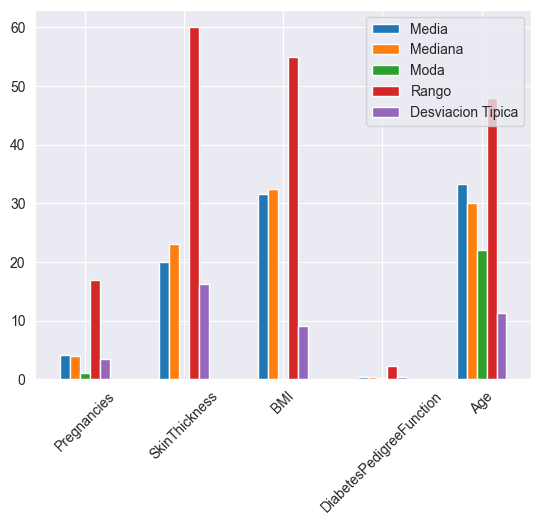

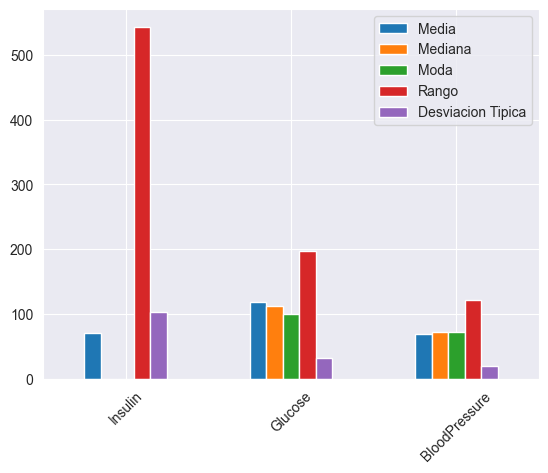

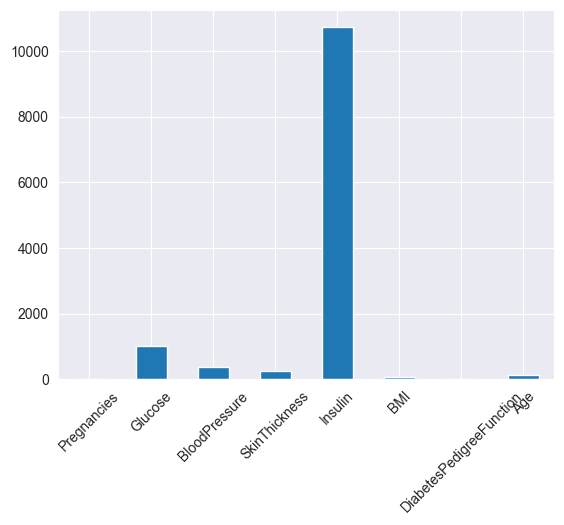

In [238]:
# Graficas de barras de la Media, Mediana, Moda, Rango, Desviacion Tipica de cada variable
varianza = media_moda_etc["Varianza"]
media_moda_etc2 = media_moda_etc.drop(["Varianza"], axis="columns")
media_moda_etc2.loc[media_moda_etc2.index.drop(["Insulin", "Glucose", "BloodPressure"])].plot.bar(rot=0)
plot.xticks(rotation=45)
media_moda_etc2.loc[["Insulin", "Glucose", "BloodPressure"]].plot.bar(rot=0)
plot.xticks(rotation=45)

# Varianza de cada variable
plot.figure()
varianza.plot.bar(rot=0)
# Etiquetas rotadas para mejor lectura
plot.xticks(rotation=45)

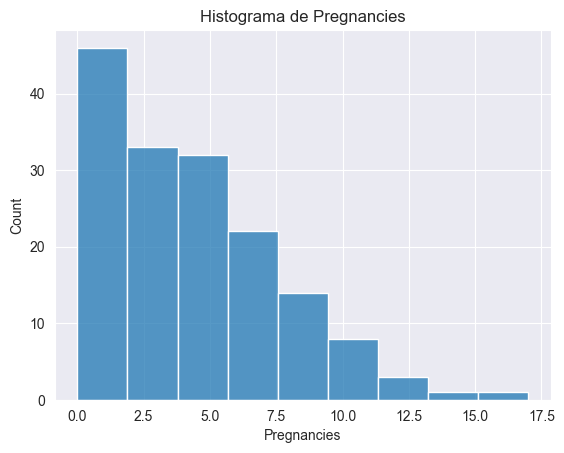

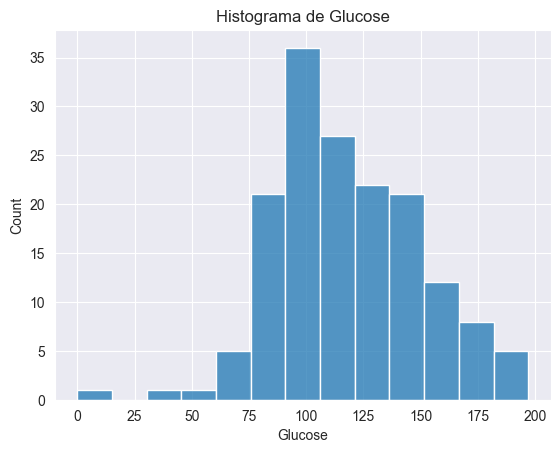

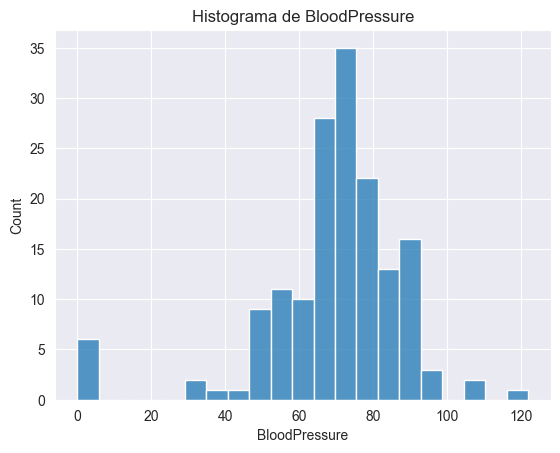

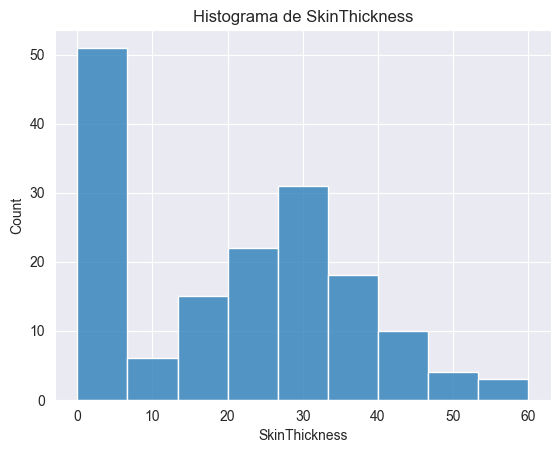

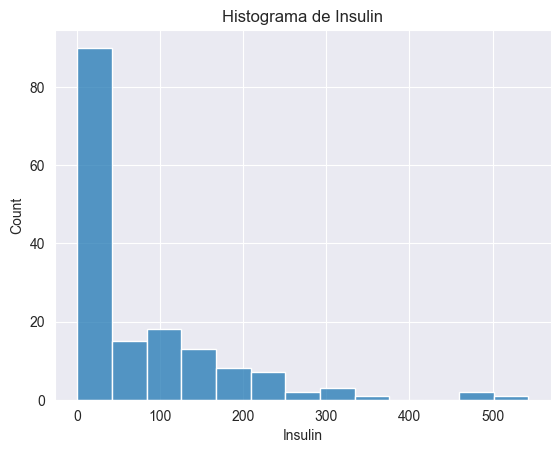

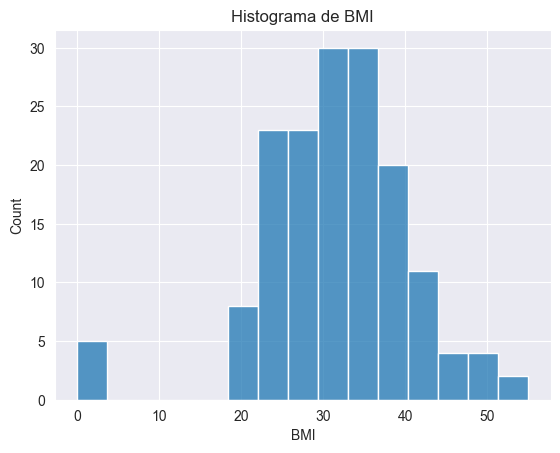

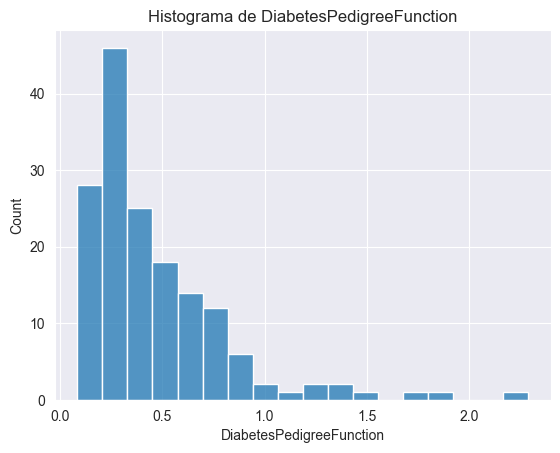

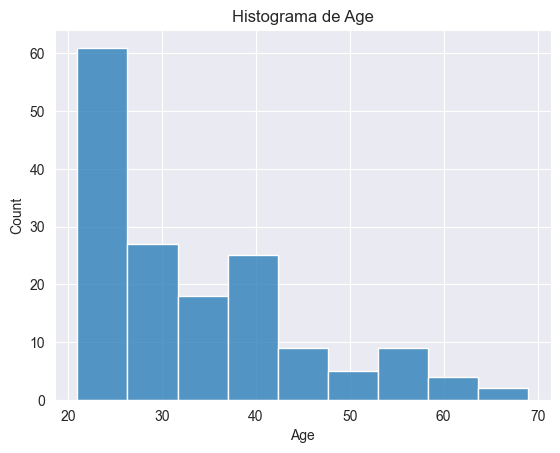

In [239]:
# Histogramas de cada variable
for x in diabetes.columns:
    plot.figure()
    sb.histplot(diabetes[x].T)
    plot.title("Histograma de " + x)

(array([0, 1, 2]),
 [Text(0, 0, 'Insulin'), Text(1, 0, 'Glucose'), Text(2, 0, 'BloodPressure')])

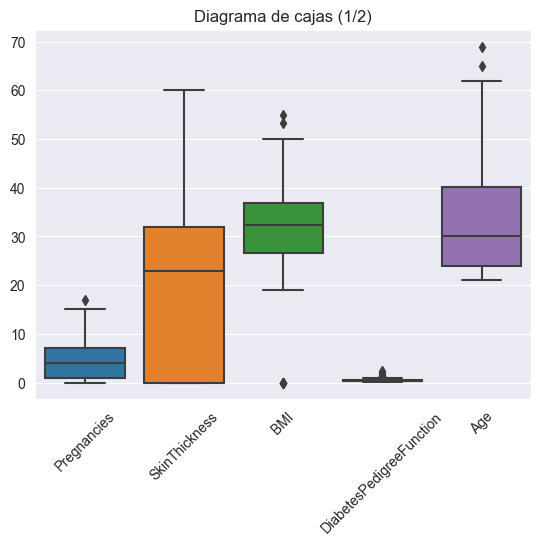

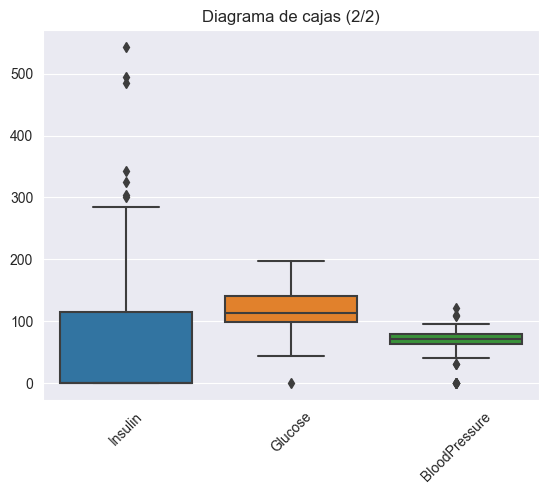

In [240]:
# Diagrama de cajas de cada variable
sb.boxplot(diabetes[diabetes.columns.drop(["Insulin", "Glucose", "BloodPressure"])])
plot.title("Diagrama de cajas (1/2)")
plot.xticks(rotation=45)

plot.figure()
sb.boxplot(diabetes[["Insulin", "Glucose", "BloodPressure"]])
plot.title("Diagrama de cajas (2/2)")
plot.xticks(rotation=45)

In [241]:
# TODO:
# ✓Un análisis de regresión para las dos variables continuas, así como su gráfico de dispersión y el
# coeficiente de correlación.
# ✓Gráficos y tablas que pueden explicar las variables de una manera más completa (diagramas de
# caja según variable categórica, por ejemplo).